
# **Representações de Histograma**

#### **Nesta lição, aprenderemos:**
1. Visualizar as representações de histograma RGB das imagens
2. Equalização de histograma 


In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

def imshow(image = None, size = 10):
    h, w = image.shape[0], image.shape[1]
    aspect_ratio = h/w
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.show()

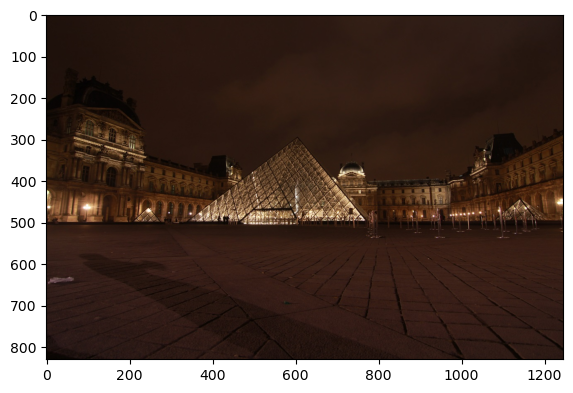

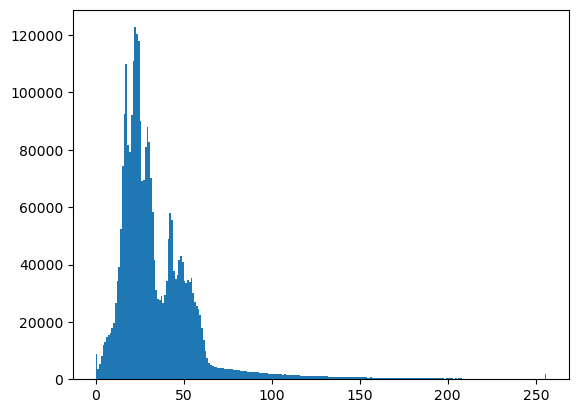

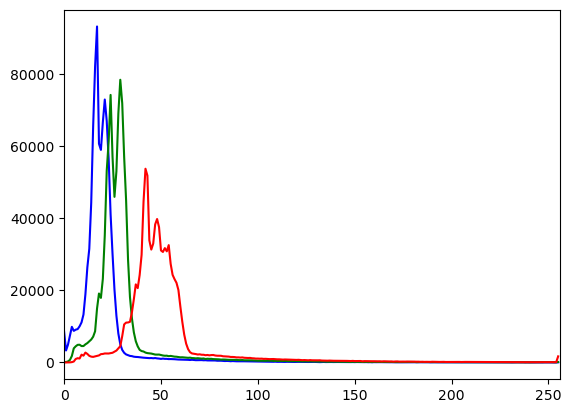

In [2]:
image = cv2.imread('images/input.jpg')
imshow(image)

# Plotamos um histograma, ravel() "aplaina" nossa matriz de imagem.
plt.hist(image.ravel(), 256, [0, 256])
plt.show()

# Agora separamos as cores e plotamos cada uma no histograma.
color = ('b', 'g', 'r')
for i, col in enumerate(color):
    histogram = cv2.calcHist([image], [i], None, [256], [0, 256])
    plt.plot(histogram, color = col)
    plt.xlim([0,256])
    
plt.show()

**cv2.calcHist(imagens, canais, máscara, histSize, faixas[, hist[, acumular]])**

- **imagens**: é a imagem de origem do tipo uint8 ou float32. Deve ser fornecida entre colchetes, ou seja, "[img]".
- **canais**: também é fornecido entre colchetes. É o índice do canal para o qual calculamos o histograma. Por exemplo, se a entrada for uma imagem em escala de cinza, o valor é [0]. Para uma imagem colorida, você pode passar [0], [1] ou [2] para calcular o histograma do canal azul, verde ou vermelho, respectivamente.
- **máscara**: imagem de máscara. Para encontrar o histograma da imagem inteira, é fornecida como "None". Mas se você quiser encontrar o histograma de uma região específica da imagem, você precisa criar uma imagem de máscara para isso e fornecê-la como máscara. (Mostrarei um exemplo posteriormente.)
- **histSize**: representa o número de BINS (intervalos). Deve ser fornecido entre colchetes. Para a escala completa, passamos [256].
- **faixas**: esta é a faixa. Normalmente, é [0, 256].

### Equalização de histograma 

* A ideia básica por trás da equalização de histograma é transformar a imagem de entrada de forma que seu histograma fique mais uniformemente distribuído. 

* Isso é feito ao esticar a faixa de intensidades de pixel de tal maneira que a imagem resultante tenha uma distribuição de intensidades mais igual. 

* A transformação geralmente é aplicada à versão em tons de cinza da imagem, mas também pode ser aplicada a canais de cor individuais no caso de imagens coloridas.

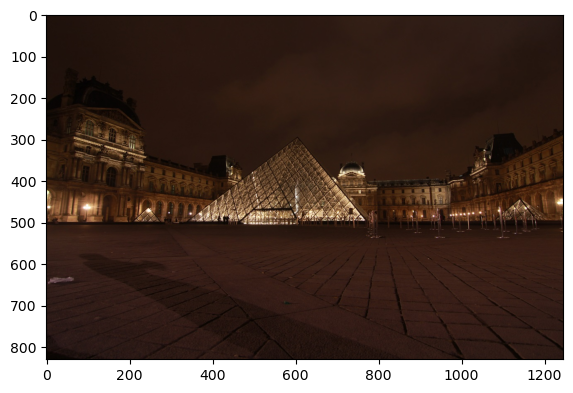

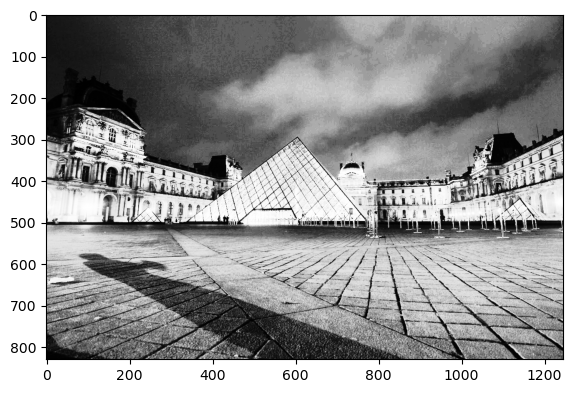

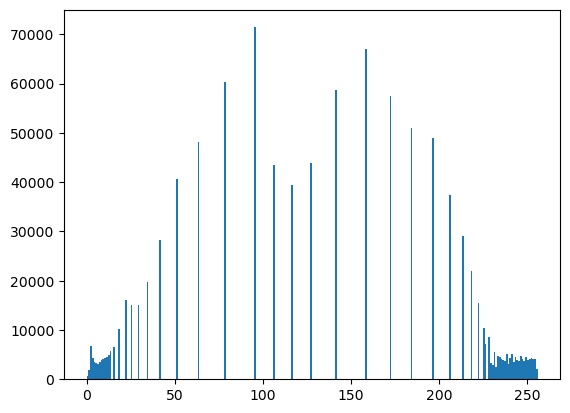

In [3]:
image = cv2.imread('images/input.jpg')
imshow(image)

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

equalized = cv2.equalizeHist(gray)
imshow(equalized)

histogram = cv2.calcHist([equalized], [0], None, [256], [0, 256])
plt.hist(equalized.ravel(), 256, [0, 256]); 
plt.show()


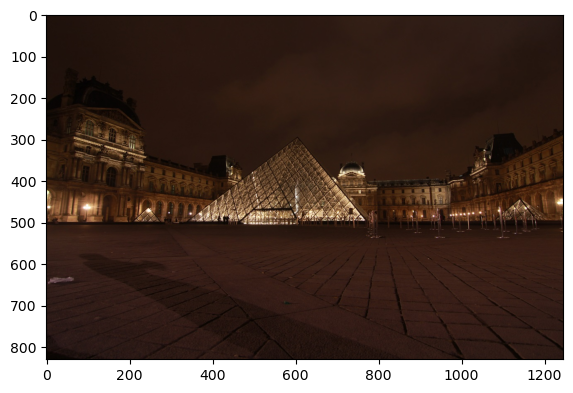

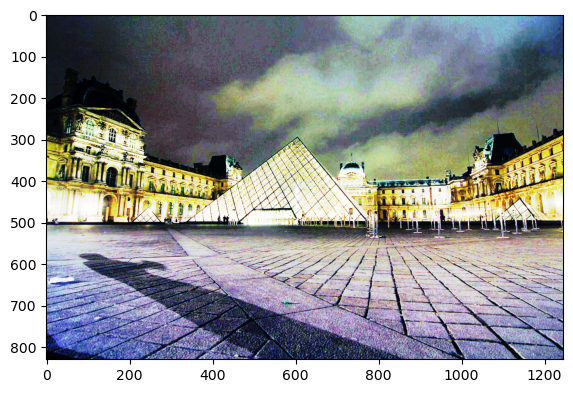

In [4]:
import cv2
import numpy as np

image = cv2.imread('images/input.jpg')

b, g, r = cv2.split(image)
b = cv2.equalizeHist(b)
g = cv2.equalizeHist(g)
r = cv2.equalizeHist(r)

enhanced_image = cv2.merge([b, g, r])

imshow(image)
imshow(enhanced_image)
